# Plotting function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plotErrorbar(x, y, gainD1, gainD2, lossD1, lossD2, ampNumber):
    ticks = [i + 1 for i in range(ampNumber)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    ax1.errorbar(x, y, yerr = gainD1, capsize = 10, label = 'Full dataset')
    ax1.errorbar(x, y, yerr = gainD2, capsize = 10, capthick = 4, label = 'Optimized dataset')
    ax2.errorbar(x, y, yerr = lossD1, capsize = 10, label = 'Full dataset')
    ax2.errorbar(x, y, yerr = lossD2, capsize = 10, capthick = 4, label = 'Optimized dataset')
    
    title = 'Gain error for ' + str(len(x)) + ' amplifiers'
    
    ax1.set_title("Gain error for " + str(len(x)) + " amplifiers")
    ax1.set_xlabel('Amplifier')
    ax1.set_ylabel('RMSE')
    ax1.set_xticks(ticks)
    
    ax2.set_title("Loss error for " + str(len(x)) + " amplifiers")
    ax2.set_xlabel('Amplifier')
    ax2.set_xticks(ticks)
    
    plt.legend()
    plt.savefig("graphs/graph-{}amps".format(ampNumber))

# Opening file and plotting graphs

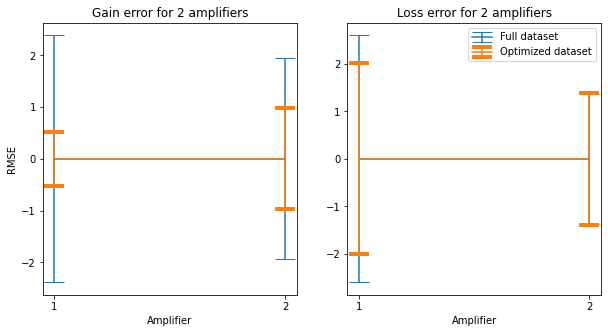

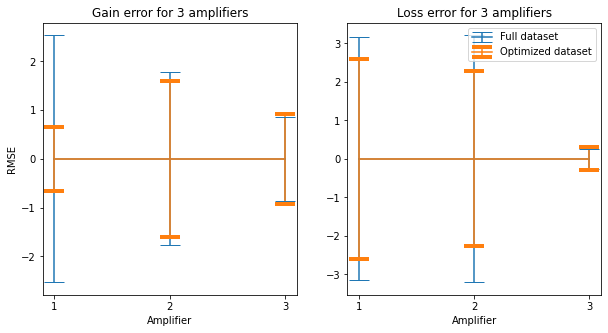

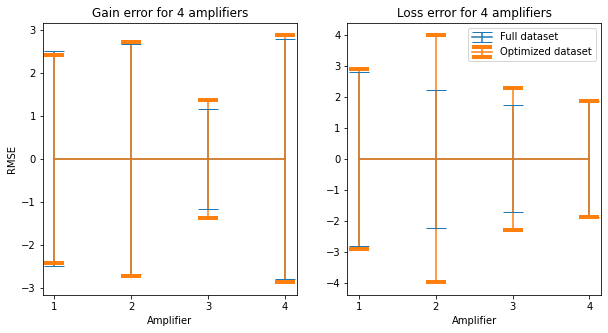

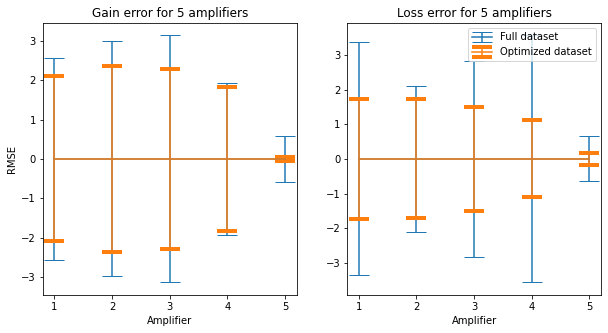

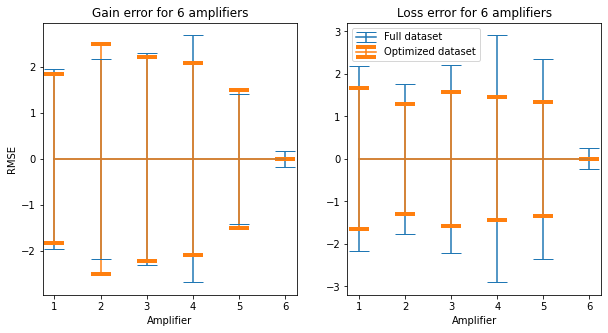

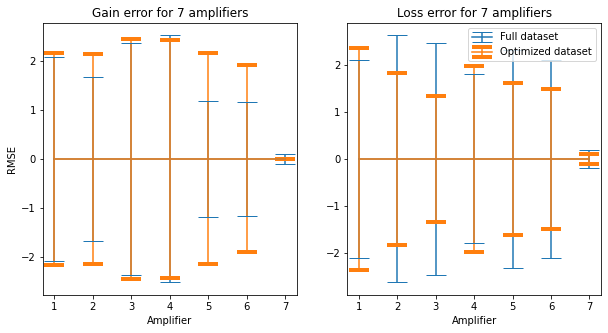

In [2]:
gainFile = open("gain-output.txt", "r")
lossFile = open("loss-output.txt", "r")
    
for gainLine, lossLine in zip(gainFile, lossFile):
    ampNumber = int(gainLine.count(",") / 2 + 1)
    
    x = [i + 1 for i in range(ampNumber)]
    y = [0 for i in range(ampNumber)]
    
    gainD1 = [ float(item) for item in gainLine.split("/")[0].split(",") ]
    gainD2 = [ float(item) for item in gainLine.split("/")[1].split(",") ]    
    
    lossD1 = [ float(item) for item in lossLine.split("/")[0].split(",") ]
    lossD2 = [ float(item) for item in lossLine.split("/")[1].split(",") ]  
    
    plotErrorbar(x, y, gainD1, gainD2, lossD1, lossD2, ampNumber)

gainFile.close()
lossFile.close()